Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 2

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [X] Plot the distribution of your target. 
    - Classification problem: Are your classes imbalanced? Then, don't use just accuracy.
    - Regression problem: Is your target skewed? If so, let's discuss in Slack.
- [X] Continue to clean and explore your data. Make exploratory visualizations.
- [X] Fit a model. Does it beat your baseline?
- [X] Try xgboost.
- [X] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

In [31]:
import pandas as pd

import numpy as np

from scipy.stats import randint, uniform
import random as ran

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import f_classif, chi2, SelectKBest, SelectPercentile, SelectFpr, SelectFromModel
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

import category_encoders as ce

from xgboost import XGBClassifier

import eli5
from eli5.sklearn import PermutationImportance

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='sklearn')

In [2]:
df = pd.read_csv("vgcSun_hot.csv")

In [3]:
target = "winner"
features = df.columns.drop("winner")

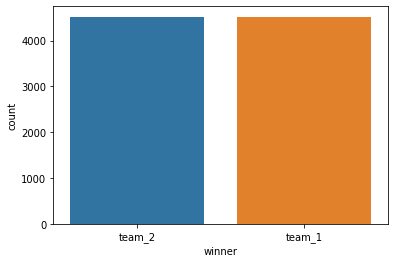

In [14]:
sns.countplot(x=df[target]);
plt.show()

The data isn't skewed, it's literally 50/50, on the dot.

In [15]:
dfTe=pd.concat([df[:903],df[3615:4518]])
dfTr=pd.concat([df[904:3614],df[4519:9034]])

In [16]:
eval_set = [(dfTe[features], dfTe[target]), (dfTr[features], dfTr[target])]

In [20]:
model = XGBClassifier(
    n_estimators = 1000,
    max_depth=7,
    learning_rate=.5,
    n_jobs=-1
)
model.fit(dfTe[features], dfTe[target], eval_set=eval_set, eval_metric="auc",
          early_stopping_rounds=50)

[0]	validation_0-auc:0.80537	validation_1-auc:0.51569
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.864276	validation_1-auc:0.52966
[2]	validation_0-auc:0.920819	validation_1-auc:0.530693
[3]	validation_0-auc:0.94231	validation_1-auc:0.517466
[4]	validation_0-auc:0.955473	validation_1-auc:0.519399
[5]	validation_0-auc:0.964494	validation_1-auc:0.526332
[6]	validation_0-auc:0.974641	validation_1-auc:0.526822
[7]	validation_0-auc:0.982171	validation_1-auc:0.527843
[8]	validation_0-auc:0.985397	validation_1-auc:0.52892
[9]	validation_0-auc:0.991442	validation_1-auc:0.53184
[10]	validation_0-auc:0.993428	validation_1-auc:0.532566
[11]	validation_0-auc:0.99368	validation_1-auc:0.532562
[12]	validation_0-auc:0.994795	validation_1-auc:0.528916
[13]	validation_0-auc:0.996001	validation_1-auc:0.531011
[14]	validation_0-auc:0.99624	validation_1-auc:0.531961
[15]	v

[141]	validation_0-auc:0.998527	validation_1-auc:0.551548
[142]	validation_0-auc:0.998527	validation_1-auc:0.551558
[143]	validation_0-auc:0.998527	validation_1-auc:0.551718
[144]	validation_0-auc:0.998527	validation_1-auc:0.551808
[145]	validation_0-auc:0.998527	validation_1-auc:0.551803
[146]	validation_0-auc:0.998527	validation_1-auc:0.551795
[147]	validation_0-auc:0.998527	validation_1-auc:0.551921
[148]	validation_0-auc:0.998527	validation_1-auc:0.551832
[149]	validation_0-auc:0.998527	validation_1-auc:0.552087
[150]	validation_0-auc:0.998527	validation_1-auc:0.55223
[151]	validation_0-auc:0.998527	validation_1-auc:0.552172
[152]	validation_0-auc:0.998527	validation_1-auc:0.5521
[153]	validation_0-auc:0.998527	validation_1-auc:0.552322
[154]	validation_0-auc:0.998527	validation_1-auc:0.552318
[155]	validation_0-auc:0.998527	validation_1-auc:0.552383
[156]	validation_0-auc:0.998527	validation_1-auc:0.552162
[157]	validation_0-auc:0.998527	validation_1-auc:0.552116
[158]	validation_

[283]	validation_0-auc:0.998527	validation_1-auc:0.554566
[284]	validation_0-auc:0.998527	validation_1-auc:0.55462
[285]	validation_0-auc:0.998527	validation_1-auc:0.554502
[286]	validation_0-auc:0.998527	validation_1-auc:0.554425
[287]	validation_0-auc:0.998527	validation_1-auc:0.554449
[288]	validation_0-auc:0.998527	validation_1-auc:0.554486
[289]	validation_0-auc:0.998527	validation_1-auc:0.554489
[290]	validation_0-auc:0.998527	validation_1-auc:0.554554
[291]	validation_0-auc:0.998527	validation_1-auc:0.554448
[292]	validation_0-auc:0.998527	validation_1-auc:0.554497
[293]	validation_0-auc:0.998527	validation_1-auc:0.554621
[294]	validation_0-auc:0.998527	validation_1-auc:0.554539
[295]	validation_0-auc:0.998527	validation_1-auc:0.554694
[296]	validation_0-auc:0.998527	validation_1-auc:0.554696
[297]	validation_0-auc:0.998527	validation_1-auc:0.554835
[298]	validation_0-auc:0.998527	validation_1-auc:0.554901
[299]	validation_0-auc:0.998527	validation_1-auc:0.554824
[300]	validatio

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Text(0.5, 0, 'Model Complexity (n_estimators)')

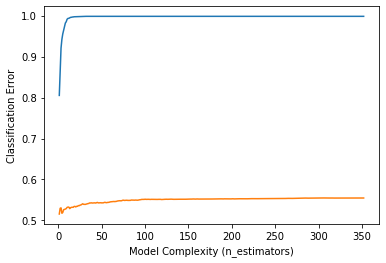

In [26]:
results = model.evals_result()
train_error=results["validation_0"]["auc"]
val_error=results["validation_1"]["auc"]
epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label="Train")
plt.plot(epoch, val_error, label="Validation")
plt.ylabel("Classification Error")
plt.xlabel("Model Complexity (n_estimators)")

Yes, this beats the baseline, but not by much, and not as much as a default random forests.

In [28]:
permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=2
)

In [29]:
permuter.fit(dfTe[features], dfTe[target])

PermutationImportance(cv='prefit',
                      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              learning_rate=0.5,
                                              max_delta_step=0, max_depth=7,
                                              min_child_weight=1, missing=None,
                                              n_estimators=1000, n_jobs=-1,
                                              nthread=None,
                                              objective='binary:logistic',
                                              random_state=0, reg_alpha=0,
                                              reg_lambda=1, scale_pos_weight=1,
                                              seed=None, silent=None,
                   

In [34]:
features

Index(['Abomasnow_team_1', 'Accelgor_team_1', 'Aegislash_team_1',
       'Aerodactyl_team_1', 'Aggron_team_1', 'Alakazam_team_1',
       'Alomomola_team_1', 'Altaria_team_1', 'Ambipom_team_1',
       'Amoonguss_team_1',
       ...
       'team2_Normal_immunity', 'team2_Fighting_immunity',
       'team2_Poison_immunity', 'team2_Ground_immunity',
       'team2_Ghost_immunity', 'team2_Electric_immunity',
       'team2_Psychic_immunity', 'team2_Dragon_immunity',
       'team1_superweaknesses', 'team2_superweaknesses'],
      dtype='object', length=908)

In [36]:
eli5.show_weights(permuter, top=None, feature_names=list(features))

Weight,Feature
0.0055 ± 0.0022,team1_hp_std
0.0044 ± 0.0011,team1_spa_mean
0.0042 ± 0.0006,team1_Ground_typedef
0.0039 ± 0.0033,team1_atk_std
0.0036 ± 0.0028,team2_mean_typedef
0.0033 ± 0.0011,team2_Rock_typedef
0.0033 ± 0.0011,team1_spd_std
0.0033 ± 0.0022,team1_spe_std
0.0030 ± 0.0039,team2_def_mean
0.0030 ± 0.0039,team2_spe_mean
